In [12]:
import pandas as pd
import os
from nltk.tokenize import RegexpTokenizer
import ast
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib

pd.set_option("display.max_colwidth", 80)

%matplotlib inline

In [14]:
df_trn = pd.read_csv("/home/ubuntu/data/cleaned/disaster_response_messages_training.csv", dtype={"split": str, "message": str, "original": str, "genre": str})
df_trn["tokens"] = df_trn["tokens"].apply(ast.literal_eval)
df_trn = df_trn.sample(frac=1.0, random_state=42)
df_trn.head(40)

,Unnamed: 0,id,split,message,original,genre,related,PII,request,offer,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_std,tokens
16944,16944,24527,train,This week the government launched a 100-million-dollar climate resilience pr...,NaN,news,1,0,0,0,...,0,0,0,0,0,0,0,0,this week the government launched a 100 million dollar climate resilience pr...,"[this, week, the, government, launched, a, 100, million, dollar, climate, re..."
20803,20803,29923,train,"Whatever the political calculations in Jakarta, disgruntled residents here b...",NaN,news,1,0,1,0,...,0,0,0,0,0,0,0,1,"whatever the political calculations in jakarta, disgruntled residents here b...","[whatever, the, political, calculations, in, jakarta, disgruntled, residents..."
6836,6836,9512,train,Bases insolubles Cu(OH)2-Fe(OH)3-Cr(OH)2-CuOH-Zn(OH)2-Al(OH)3-Pb(OH)2 Base I...,Bases insolubles Cu ( OH ) 2-Fe ( OH ) 3-Cr ( OH ) 2-CuOH-Zn ( OH ) 2-Al ( O...,direct,0,0,0,0,...,0,0,0,0,0,0,0,0,bases insolubles cu(oh)2 fe(oh)3 cr(oh)2 cuoh zn(oh)2 al(oh)3 pb(oh)2 base i...,"[bases, insolubles, cu, oh, 2, fe, oh, 3, cr, oh, 2, cuoh, zn, oh, 2, al, oh..."
5865,5865,8227,train,I want to get contact with an Organisation (ONG) to let it know that I have ...,Mwen bezwen antre an kontak ak 0NG paske m gen anpil problem ak moun ki mala...,direct,1,0,1,0,...,0,0,0,0,0,0,0,1,i want to get contact with an organisation (ong) to let it know that i have ...,"[i, want, to, get, contact, with, an, organisation, ong, to, let, it, know, ..."
7628,7628,10665,train,"The SMS: Hello at you operators, I will ask you for information. Is there wo...","Bonjour vous operateurs,je vais vous demander une information.Est qu'il aur...",direct,1,0,0,0,...,0,0,0,0,0,0,0,0,"the sms hello at you operators, i will ask you for information is there wo...","[the, sms, hello, at, you, operators, i, will, ask, you, for, information, i..."
11968,11968,17622,train,The China Meteorological Administration issued a red alert early that day fo...,NaN,news,1,0,0,0,...,0,0,0,0,0,0,0,0,the china meteorological administration issued a red alert early that day fo...,"[the, china, meteorological, administration, issued, a, red, alert, early, t..."
11062,11062,16382,train,"In the Philippines, millions of terrified flood survivors, many of them shel...",NaN,news,1,0,0,0,...,1,1,1,0,0,0,0,0,"in the philippines, millions of terrified flood survivors, many of them shel...","[in, the, philippines, millions, of, terrified, flood, survivors, many, of, ..."
6024,6024,8431,train,"If I have diarrhe what can I do,I am a survivor",Si m gen kolerin kisa pou m fe m se yon riskape,direct,1,0,1,0,...,0,0,0,0,0,0,0,1,"if i have diarrhe what can i do,i am a survivor","[if, i, have, diarrhe, what, can, i, do, i, am, a, survivor]"
11216,11216,16587,train,The engineers have trained thousands of people to build and design their hou...,NaN,news,1,0,0,0,...,0,0,0,0,0,0,0,0,the engineers have trained thousands of people to build and design their hou...,"[the, engineers, have, trained, thousands, of, people, to, build, and, desig..."
17064,17064,24686,train,Assessment missions by government authorities were conducted in extremely di...,NaN,news,0,0,0,0,...,0,0,0,0,0,0,0,0,assessment missions by government authorities were conducted in extremely di...,"[assessment, missions, by, government, authorities, were, conducted, in, ext..."


In [3]:
df_val = pd.read_csv("/home/ubuntu/data/cleaned/disaster_response_messages_validation.csv", dtype={"split": str, "message": str, "original": str, "genre": str})
df_val["tokens"] = df_val["tokens"].apply(ast.literal_eval)
df_val.head()

,Unnamed: 0,id,split,message,original,genre,related,PII,request,offer,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_std,tokens
0,0,8,validation,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,...,0,0,0,0,0,0,0,0,looking for someone but no name,"[looking, for, someone, but, no, name]"
1,1,18,validation,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,0,1,0,...,0,0,0,0,0,0,0,1,i am in croix des bouquets we have health iss...,"[i, am, in, croix, des, bouquets, we, have, he..."
2,2,28,validation,are you going to call me or do you want me to ...,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,...,0,0,0,0,0,0,0,0,are you going to call me or do you want me to ...,"[are, you, going, to, call, me, or, do, you, w..."
3,3,38,validation,"People I'm at Delma 2, we don't anything what ...",MEZANMI MWEN MWEN NAN DELMA 2 NOU TR MAN MAL N...,direct,1,0,1,0,...,0,0,0,0,0,0,0,1,"people i'm at delma 2, we don't anything what ...","[people, i, m, at, delma, 2, we, don, t, anyth..."
4,4,48,validation,How we can find food and water? we have people...,Comment nou ka jwen dlo ak manje nou gen moun ...,direct,1,0,0,0,...,0,0,0,0,0,0,0,0,how we can find food and water? we have people...,"[how, we, can, find, food, and, water, we, hav..."


In [15]:
cv = CountVectorizer()
X_trn = cv.fit_transform(df_trn["message_std"])
y_trn = df_trn["related"]

X_val = cv.transform(df_val["message_std"])
y_val = df_val["related"]

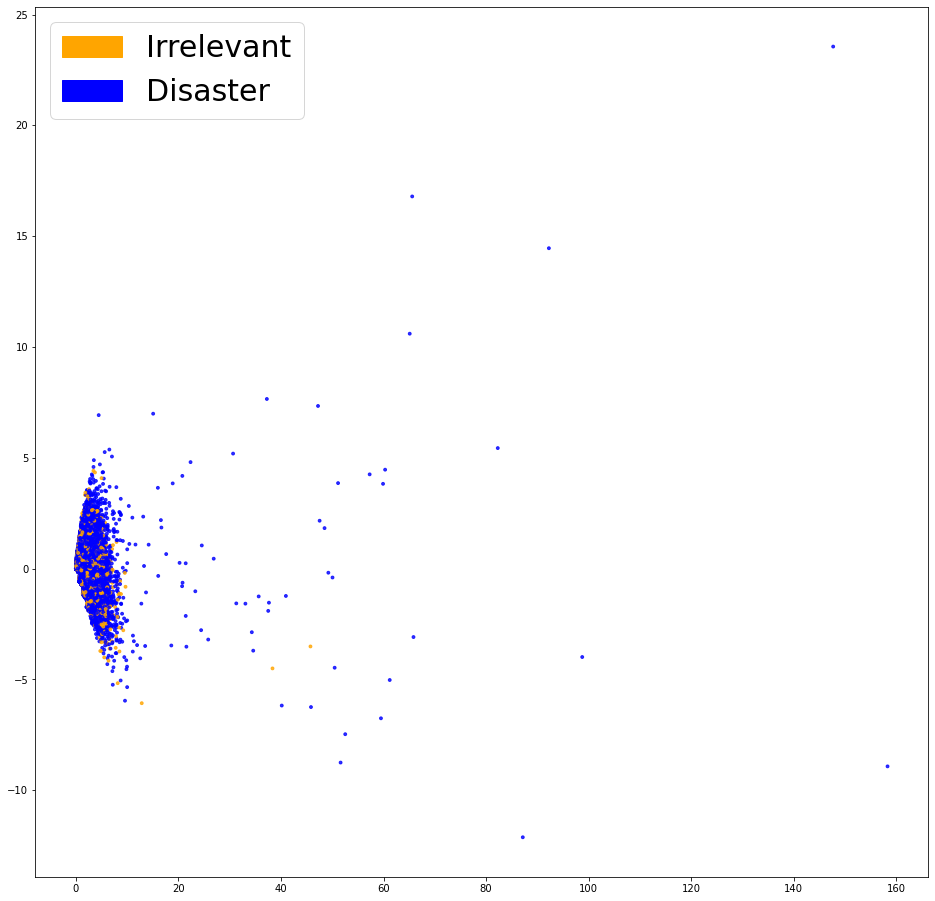

In [19]:
lsa = TruncatedSVD(n_components=2)
lsa.fit(X_trn)
lsa_scores = lsa.transform(X_trn)
color_mapper = {label:idx for idx, label in enumerate(set(y_trn))}
color_column = [color_mapper[label] for label in y_trn]
colors = ["orange", "blue", "blue"]

fig = plt.figure(figsize=(16, 16))
plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=0.8, c=y_trn, cmap=matplotlib.colors.ListedColormap(colors))
red_patch = mpatches.Patch(color="orange", label="Irrelevant")
green_patch = mpatches.Patch(color="blue", label="Disaster")
plt.legend(handles=[red_patch, green_patch], prop={"size": 30})

plt.show()